In [1]:
# load packages
library("adegenet")
library("dplyr")
library("vcfR")
library("ape")

Loading required package: ade4
Registered S3 method overwritten by 'spdep':
  method   from
  plot.mst ape 

   /// adegenet 2.1.1 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


   *****       ***   vcfR   ***       *****
   This is vcfR 1.8.0 
     browseVignettes('vcfR') # Documentation
     citation('vcfR') # Citation
   *****       *****      *****       *****



In [2]:
#load the vcf file and transform into genlight class
vcf <- read.vcfR("PV_filteredPASS_0808.vcf.gz", verbose = FALSE)
x <- vcfR2genlight(vcf)
x

 /// GENLIGHT OBJECT /////////

 // 43 genotypes,  191,849 binary SNPs, size: 23.4 Mb
 988244 (11.98 %) missing data

 // Basic content
   @gen: list of 43 SNPbin

 // Optional content
   @ind.names:  43 individual labels
   @loc.names:  191849 locus labels
   @chromosome: factor storing chromosomes of the SNPs
   @position: integer storing positions of the SNPs
   @other: a list containing: elements without names 


In [3]:
#set the population for the samples
popx<-c("Gia Lai", "Gia Lai", "Gia Lai", "Gia Lai", "Gia Lai", "Gia Lai", "Gia Lai", "Gia Lai", "Gia Lai", "Gia Lai", "Gia Lai", "Gia Lai", "Gia Lai", "Gia Lai", "Gia Lai", "Gia Lai", "Gia Lai", "Gia Lai", "Gia Lai", "Gia Lai", "Gia Lai", "Gia Lai", "Gia Lai", "Gia Lai", "Gia Lai", "Gia Lai", "Gia Lai", "Gia Lai", "Binh Phuoc", "Binh Phuoc", "Binh Phuoc", "Binh Phuoc", "Binh Phuoc", "Binh Phuoc", "Binh Phuoc", "Binh Phuoc", "Dak Lak", "Dak Lak", "Dak Lak", "Dak Lak", "Dak Nong", "Dak Nong", "Khanh Hoa")
pop(x)<-popx
x@pop

[1] Gia Lai    Gia Lai    Gia Lai    Gia Lai    Gia Lai    Gia Lai   
 [7] Gia Lai    Gia Lai    Gia Lai    Gia Lai    Gia Lai    Gia Lai   
[13] Gia Lai    Gia Lai    Gia Lai    Gia Lai    Gia Lai    Gia Lai   
[19] Gia Lai    Gia Lai    Gia Lai    Gia Lai    Gia Lai    Gia Lai   
[25] Gia Lai    Gia Lai    Gia Lai    Gia Lai    Binh Phuoc Binh Phuoc
[31] Binh Phuoc Binh Phuoc Binh Phuoc Binh Phuoc Binh Phuoc Binh Phuoc
[37] Dak Lak    Dak Lak    Dak Lak    Dak Lak    Dak Nong   Dak Nong  
[43] Khanh Hoa 
Levels: Binh Phuoc Dak Lak Dak Nong Gia Lai Khanh Hoa

# First round of selection of SNPs

First Round of selection performed in Python for each chromosome using the following criteria: 
SNPs> 30% missing calls
pairwise LD>0.2 in 500bp windows
MAF <10%
Tajima’s D>0.5 in 500bp windows

See notebooks: P.vivax WGS analysis Vietnam_chr# 
SNPs within 500bp windows with Tajima’s D>0.5  marked manually in excel

In [4]:
#Combine data from first round of selection per chromosome: 
chr1  <- read.csv("chrom1_select_LD_MAF_D.csv", header = TRUE, sep=",")
chr2  <- read.csv("chrom2_select_LD_MAF_D.csv", header = TRUE, sep=",")
chr3  <- read.csv("chrom3_select_LD_MAF_D.csv", header = TRUE, sep=",")
chr4  <- read.csv("chrom4_select_LD_MAF_D.csv", header = TRUE, sep=",")
chr5  <- read.csv("chrom5_select_LD_MAF_D.csv", header = TRUE, sep=",")
chr6  <- read.csv("chrom6_select_LD_MAF_D.csv", header = TRUE, sep=",")
chr7  <- read.csv("chrom7_select_LD_MAF_D.csv", header = TRUE, sep=",")
chr8  <- read.csv("chrom8_select_LD_MAF_D.csv", header = TRUE, sep=",")
chr9  <- read.csv("chrom9_select_LD_MAF_D.csv", header = TRUE, sep=",")
chr10  <- read.csv("chrom10_select_LD_MAF_D.csv", header = TRUE, sep=",")
chr11  <- read.csv("chrom11_select_LD_MAF_D.csv", header = TRUE, sep=",")
chr12 <- read.csv("chrom12_select_LD_MAF_D.csv", header = TRUE, sep=",")
chr13  <- read.csv("chrom13_select_LD_MAF_D.csv", header = TRUE, sep=",")
chr14  <- read.csv("chrom14_select_LD_MAF_D.csv", header = TRUE, sep=",")
db<-rbind(chr1,chr2)
db<-rbind(db,chr3)
db<-rbind(db,chr4)
db<-rbind(db,chr5)
db<-rbind(db,chr6)
db<-rbind(db,chr7)
db<-rbind(db,chr8)
db<-rbind(db,chr9)
db<-rbind(db,chr10)
db<-rbind(db,chr11)
db<-rbind(db,chr12)
db<-rbind(db,chr13)
db<-rbind(db,chr14)
head(db)

chrom,pos,locnames,AF,D_pass
PvP01_01_v1,116703,PvP01_01_v1_116703,0.2162162,0
PvP01_01_v1,116892,PvP01_01_v1_116892,0.1538462,0
PvP01_01_v1,117271,PvP01_01_v1_117271,0.1111111,0
PvP01_01_v1,118519,PvP01_01_v1_118519,0.3250000,0
PvP01_01_v1,119346,PvP01_01_v1_119346,0.1052632,0
PvP01_01_v1,120024,PvP01_01_v1_120024,0.4444444,0


In [5]:
table(db$chrom)


PvP01_01_v1 PvP01_02_v1 PvP01_03_v1 PvP01_04_v1 PvP01_05_v1 PvP01_06_v1 
         98          91         110          89         161         125 
PvP01_07_v1 PvP01_08_v1 PvP01_09_v1 PvP01_10_v1 PvP01_11_v1 PvP01_12_v1 
        146         163         181         145         198         286 
PvP01_13_v1 PvP01_14_v1 
        198         272 

In [6]:
#make db of only selected SNPs
db.pass<-filter(db,D_pass==1)
dim(db.pass)

[1] 1152    5

So 1152 SNPs passed the first round of selection. 
Nr's per chromosome: 

In [7]:
table(db.pass$chrom)


PvP01_01_v1 PvP01_02_v1 PvP01_03_v1 PvP01_04_v1 PvP01_05_v1 PvP01_06_v1 
         51          47          48          45          83          51 
PvP01_07_v1 PvP01_08_v1 PvP01_09_v1 PvP01_10_v1 PvP01_11_v1 PvP01_12_v1 
         82          94          86          78         110         141 
PvP01_13_v1 PvP01_14_v1 
        100         136 

In [8]:
#make genlight with only 1st selection of SNPs
keeploc<-as.character(db.pass$locnames)
class(keeploc)
length(keeploc)

x.sel <- x[,keeploc]
x.sel

[1] "character"

[1] 1152

 /// GENLIGHT OBJECT /////////

 // 43 genotypes,  1,152 binary SNPs, size: 212 Kb
 5655 (11.42 %) missing data

 // Basic content
   @gen: list of 43 SNPbin

 // Optional content
   @ind.names:  43 individual labels
   @loc.names:  1152 locus labels
   @chromosome: factor storing chromosomes of the SNPs
   @position: integer storing positions of the SNPs
   @pop: population of each individual (group size range: 1-28)
   @other: a list containing: elements without names 


## Analysis of first round of selection

 === PCA of genlight object ===
Class: list of type glPca
Call ($call):glPca(x = x.sel, nf = 25)

Eigenvalues ($eig):
 18.54 12.171 9.95 9.485 8.522 8.122 ...

Principal components ($scores):
 matrix with 43 rows (individuals) and 25 columns (axes) 

Principal axes ($loadings):
 matrix with 1152 rows (SNPs) and 25 columns (axes) 


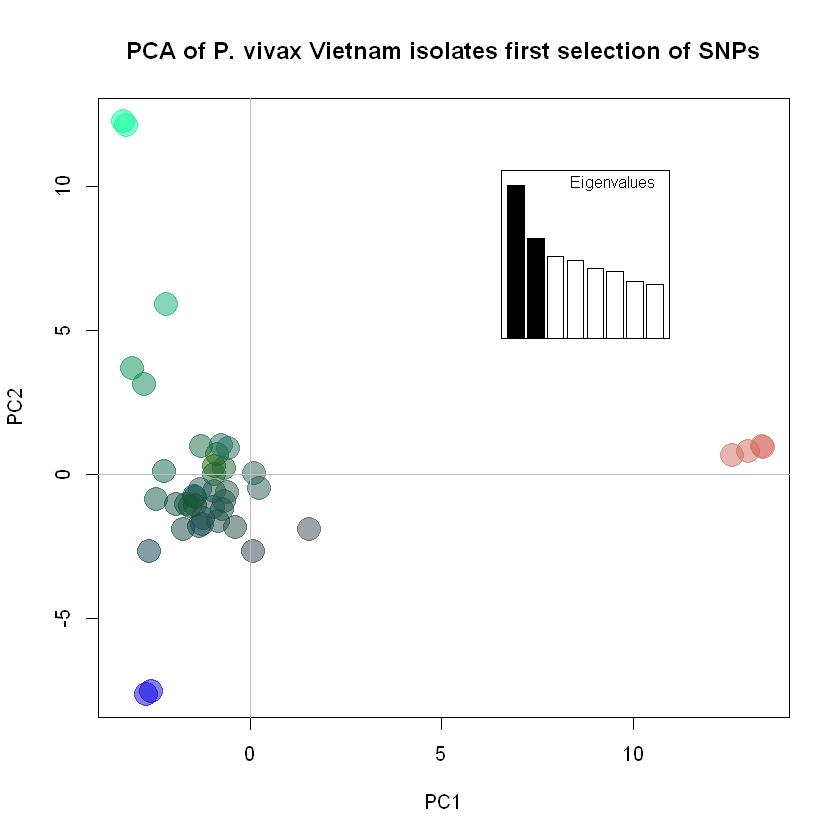

In [9]:
### PCA
pca1 <- glPca(x.sel, nf=25)
pca1

myCol <- colorplot(pca1$scores,pca1$scores, transp=TRUE, cex=4)
abline(h=0,v=0, col="grey")
add.scatter.eig(pca1$eig[1:8],2,1,2, posi="topright", inset=.2, ratio=.2)
title("PCA of P. vivax Vietnam isolates first selection of SNPs")




Phylogenetic tree with 43 tips and 41 internal nodes.

Tip labels:
	CRCPV-007-0a, CRCPV-007-35, CRCPV-008-0a, CRCPV-008-42, CRCPV-010-0a, CRCPV-010-35, ...

Unrooted; includes branch lengths.

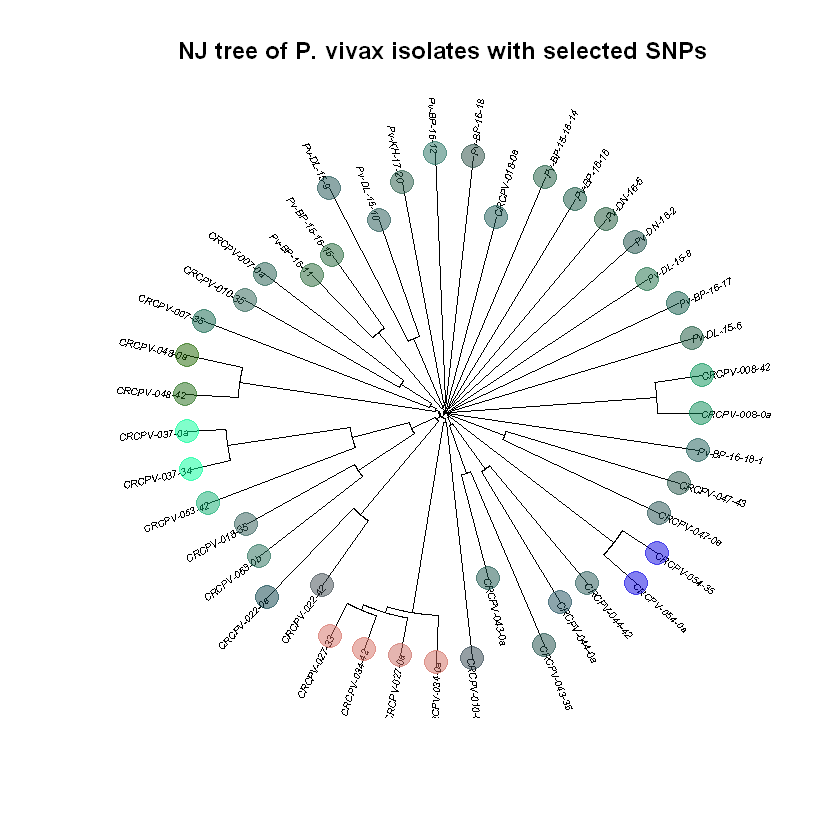

In [10]:
#NJ-tree
tre <- njs(dist(as.matrix(x.sel)))
tre
plot(tre, typ="fan", show.tip=TRUE, cex=0.5)
tiplabels(pch=20, col=myCol, cex=4)
title("NJ tree of P. vivax isolates with selected SNPs")


# Selection round 2

## Loading plot to find contributing SNPs to clustering by K-means

    
     Binh Phuoc Dak Lak Dak Nong Gia Lai Khanh Hoa
  1           1       0        0       0         0
  2           0       0        0       1         0
  3           0       0        0       0         1
  4           0       0        1       0         0
  5           0       0        0       1         0
  6           0       0        0       1         0
  7           1       0        0       0         0
  8           0       1        0       0         0
  9           2       0        0       0         0
  10          1       0        0       0         0
  11          0       0        0       1         0
  12          1       0        0       0         0
  13          0       0        0       2         0
  14          0       0        0       3         0
  15          0       0        0       2         0
  16          0       0        0       2         0
  17          0       0        0       3         0
  18          0       0        0       5         0
  19          1       0   

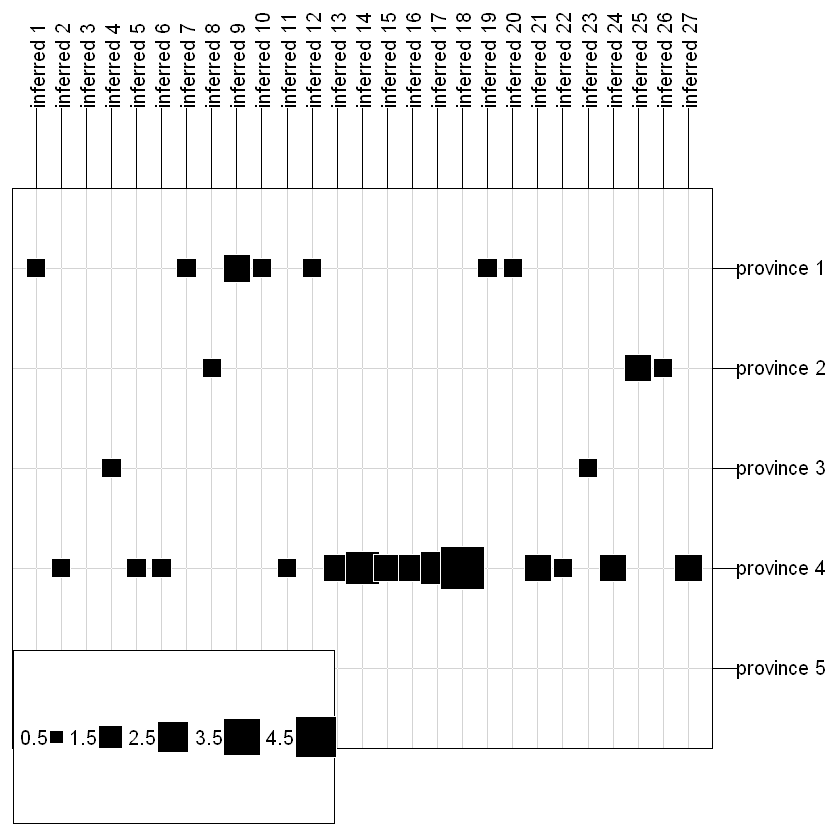

In [11]:
#Identifying clusters using find.clusters
grp <- find.clusters(x.sel, n.pca=25, n.clust=27, max.n.clust=28)

table(grp$grp, pop(x.sel))
table.value(table(pop(x.sel), grp$grp), col.lab=paste("inferred", 1:27),
            row.lab=paste("province", 1:5))

	#################################################
	# Discriminant Analysis of Principal Components #
	#################################################
class: dapc
$call: dapc.genlight(x = x.sel, pop = grp$grp, n.pca = 25, n.da = 4)

$n.pca: 25 first PCs of PCA used
$n.da: 4 discriminant functions saved
$var (proportion of conserved variance): 0.917

$eig (eigenvalues): 7.944e+33 3.267e+33 1.729e+33 1.104e+33 7.961e+32 ...

  vector    length content                   
1 $eig      25     eigenvalues               
2 $grp      43     prior group assignment    
3 $prior    27     prior group probabilities 
4 $assign   43     posterior group assignment
5 $pca.cent 1152   centring vector of PCA    
6 $pca.norm 1152   scaling vector of PCA     
7 $pca.eig  42     eigenvalues of PCA        

  data.frame    nrow ncol content                                          
1 $tab          43   25   retained PCs of PCA                              
2 $means        27   25   group means             

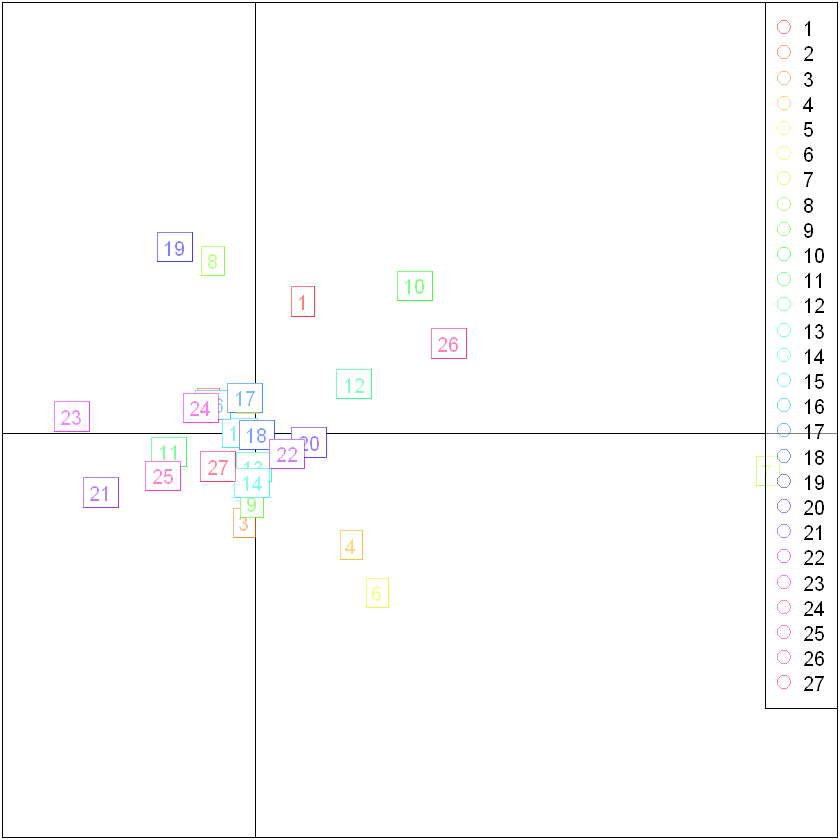

In [12]:
#DAPC with grp
dapc1 <- dapc(x.sel, grp$grp, n.pca=25, n.da=4)
dapc1

col <- rainbow(27)

scatter(dapc1, scree.da=FALSE, bg="white", pch=21, cell=1, cstar=1, col=col, solid=0.5, cex=1.5, legend=TRUE)


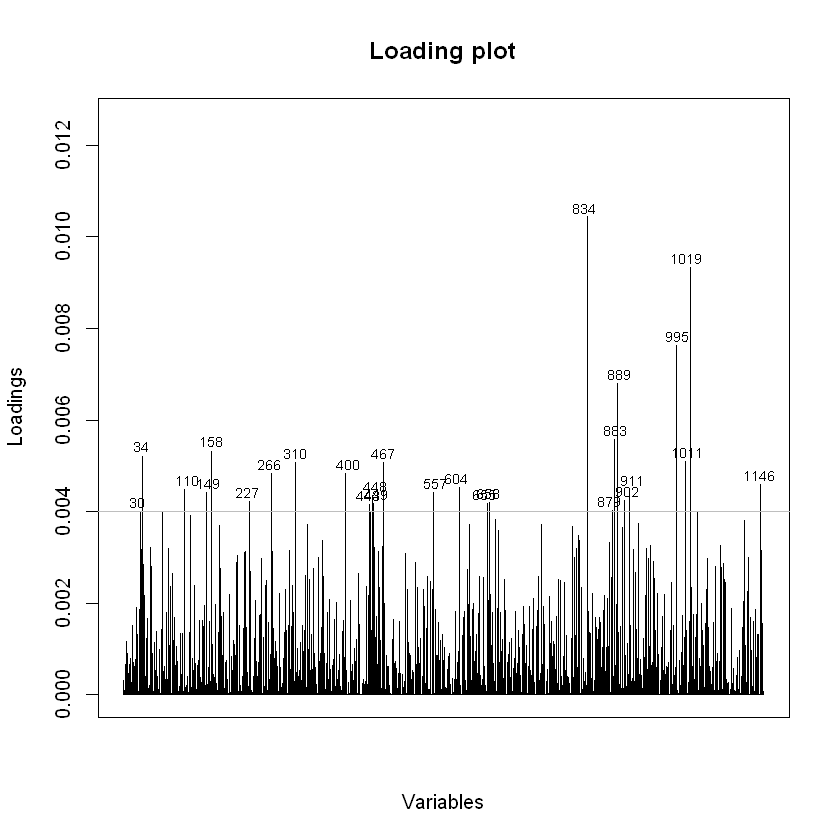

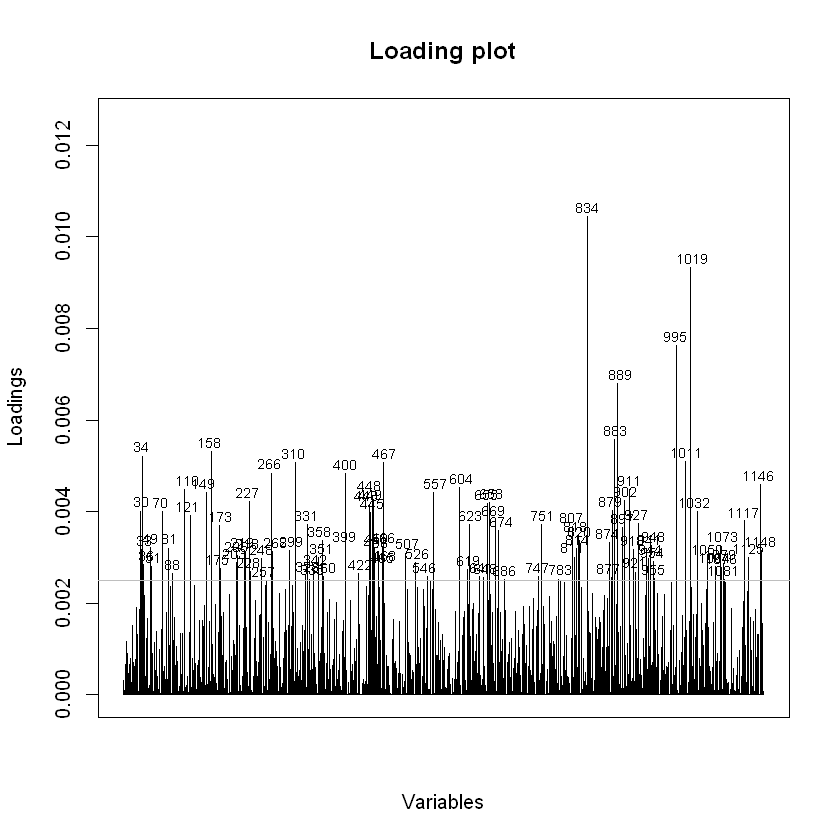

In [13]:
#make loading plots and wrtie csv of top contributing SNPs
contrib <- loadingplot(dapc1$var.contr,thres=.0040, lab.jitter=30)
ContribSNPs<- cbind(contrib$var.names,contrib$var.idx, contrib$var.values)
write.csv(ContribSNPs, file = "Contributing_selected_SNPs_grp_060919.csv")

contrib1 <- loadingplot(dapc1$var.contr,thres=.0025, lab.jitter=30)
ContribSNPs1<- cbind(contrib1$var.names,contrib1$var.idx, contrib1$var.values)
write.csv(ContribSNPs1, file = "Contributing_selected_SNPs_grp1_090919.csv")

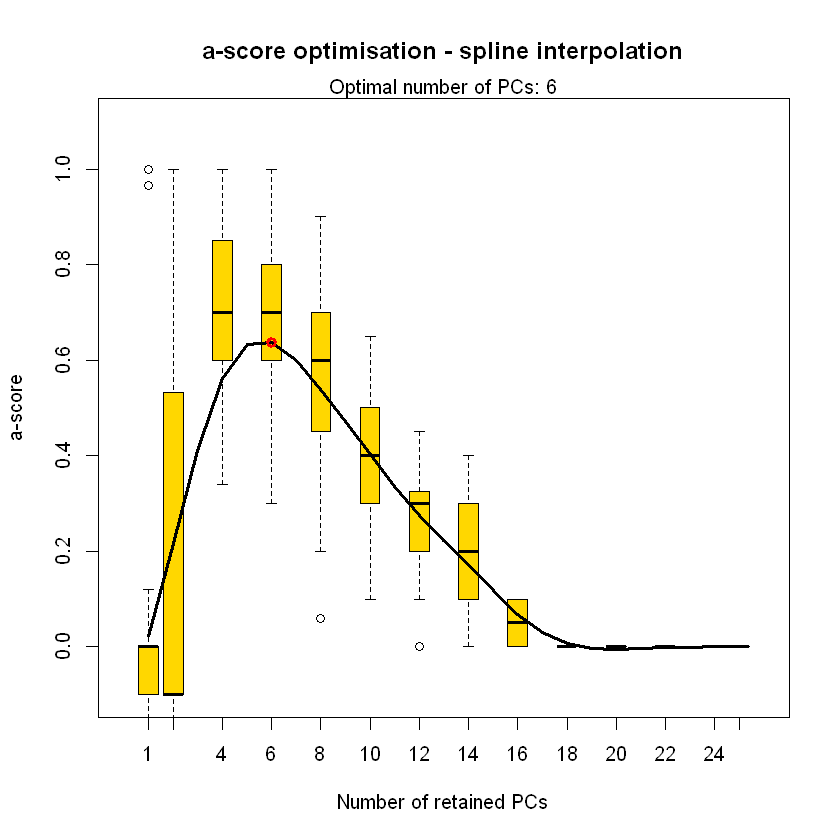

In [14]:
## a-scores to determine optimal PCs
temp <- optim.a.score(dapc1)

##  Loading plot to find contributing SNPs to clustering by province

	#################################################
	# Discriminant Analysis of Principal Components #
	#################################################
class: dapc
$call: dapc.genlight(x = x.sel, pop = pop(x.sel), n.pca = 25, n.da = 4)

$n.pca: 25 first PCs of PCA used
$n.da: 4 discriminant functions saved
$var (proportion of conserved variance): 0.917

$eig (eigenvalues): 10930 755.3 295.6 154.7  vector    length content                   
1 $eig      4      eigenvalues               
2 $grp      43     prior group assignment    
3 $prior    5      prior group probabilities 
4 $assign   43     posterior group assignment
5 $pca.cent 1152   centring vector of PCA    
6 $pca.norm 1152   scaling vector of PCA     
7 $pca.eig  42     eigenvalues of PCA        

  data.frame    nrow ncol content                                          
1 $tab          43   25   retained PCs of PCA                              
2 $means        5    25   group means                                      
3 $

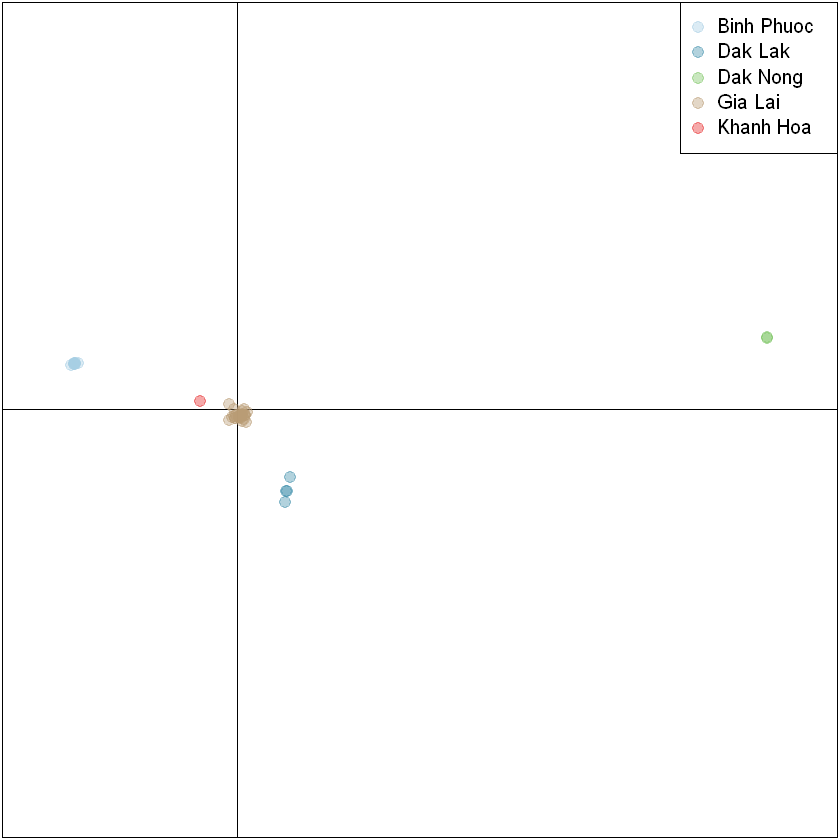

In [15]:
dapc2 <- dapc(x.sel, pop(x.sel), n.pca=25, n.da=4)
dapc2
col2 <- funky(10)
scatter(dapc2, scree.da=FALSE, bg="white", pch=20, cell=0, cstar=0, col=col2, solid=.4,
        cex=2,clab=0, leg=TRUE)


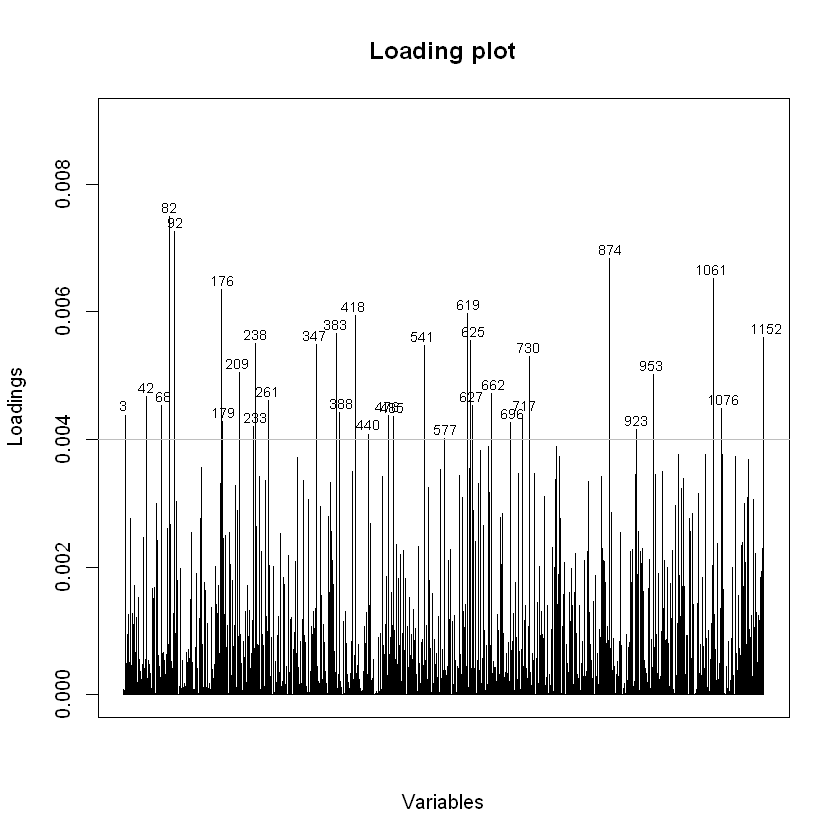

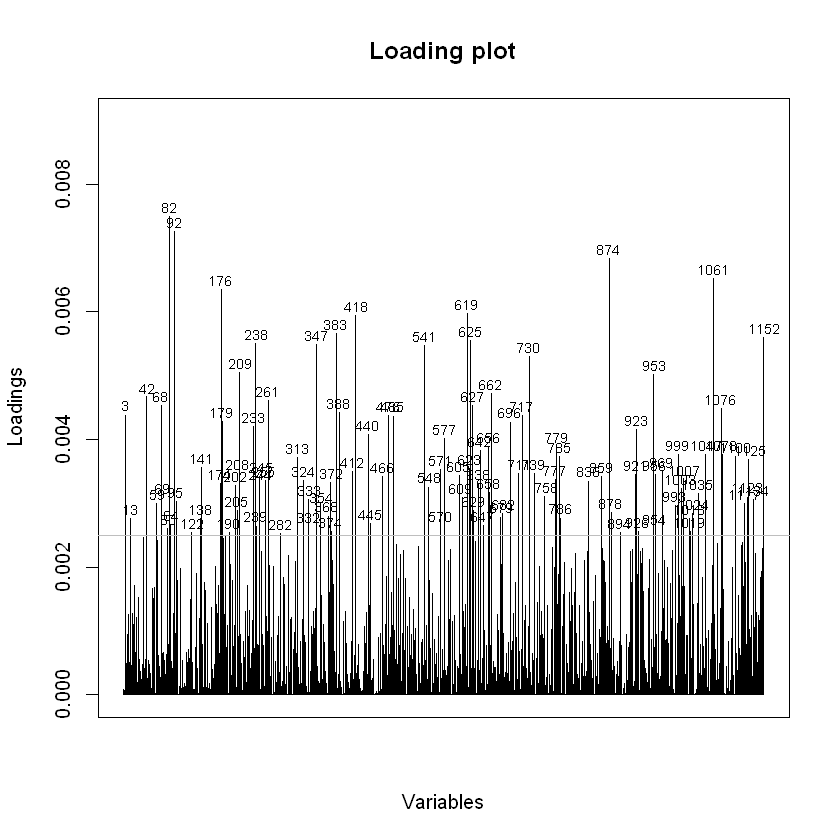

In [16]:
contrib2.p <- loadingplot(dapc2$var.contr, thres=.004, lab.jitter=12)
Contribprov<- cbind(contrib2.p$var.names,contrib2.p$var.idx, contrib2.p$var.values)
write.csv(Contribprov, file = "Contributing_selected_SNPs_prov_060919.csv")

contrib3.p <- loadingplot(dapc2$var.contr, thres=.0025, lab.jitter=12)
Contribprov3<- cbind(contrib3.p$var.names,contrib3.p$var.idx, contrib3.p$var.values)
write.csv(Contribprov3, file = "Contributing_selected_SNPs_prov2_090919.csv")


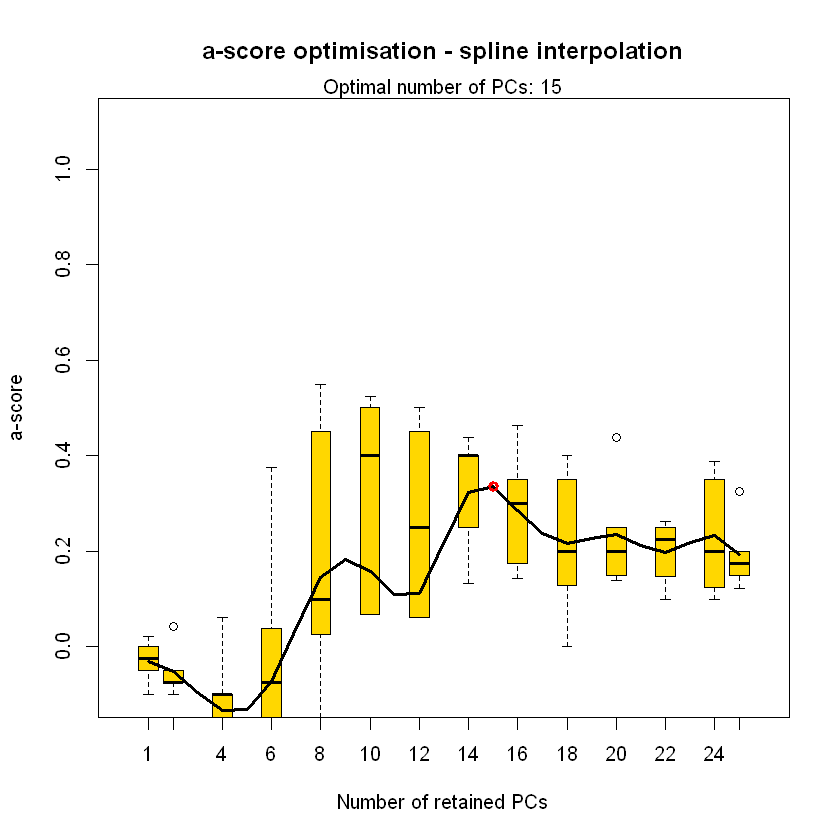

In [17]:
## a-scores to determine optimal PCs
temp <- optim.a.score(dapc2)

## Analysis of final selection of SNPs  

Using the contributions list of the SNPs for the 2 DAPCs, 3 SNPs per chromosome were selected (manually) looking at loading cotnribution and distribution over the chromosome (position). 

In [18]:
#selected 3 SNPs per chromosome
selection2<-c("PvP01_01_v1_121166", 
              "PvP01_01_v1_164620",
              "PvP01_01_v1_671781",
              "PvP01_02_v1_198112",
              "PvP01_02_v1_373744",
              "PvP01_02_v1_594798",
              "PvP01_03_v1_127847",
              "PvP01_03_v1_334738",
              "PvP01_03_v1_782122",
              "PvP01_04_v1_421012",
              "PvP01_04_v1_514934",
              "PvP01_04_v1_885624",
              "PvP01_05_v1_192482",
              "PvP01_05_v1_452277",
              "PvP01_05_v1_701523",
              "PvP01_06_v1_45794",
              "PvP01_06_v1_278171",
              "PvP01_06_v1_944771",
              "PvP01_07_v1_754506",
              "PvP01_07_v1_1020470",
              "PvP01_07_v1_1211093",
              "PvP01_08_v1_45083",
              "PvP01_08_v1_53327",
              "PvP01_08_v1_1591244",
              "PvP01_09_v1_539410",
              "PvP01_09_v1_1070402",
              "PvP01_09_v1_1838632",
              "PvP01_10_v1_351755",
              "PvP01_10_v1_523718",
              "PvP01_10_v1_1385673",
              "PvP01_11_v1_245834",
              "PvP01_11_v1_720439",
              "PvP01_11_v1_1145363",
              "PvP01_12_v1_94291",
              "PvP01_12_v1_844166",
              "PvP01_12_v1_1844936",
              "PvP01_13_v1_162821",
              "PvP01_13_v1_659592",
              "PvP01_13_v1_1770129",
              "PvP01_14_v1_743338",
              "PvP01_14_v1_1911110",
              "PvP01_14_v1_3004298"
)
x.sel2 <- x[,selection2]
x.sel2

 /// GENLIGHT OBJECT /////////

 // 43 genotypes,  42 binary SNPs, size: 74.5 Kb
 216 (11.96 %) missing data

 // Basic content
   @gen: list of 43 SNPbin

 // Optional content
   @ind.names:  43 individual labels
   @loc.names:  42 locus labels
   @chromosome: factor storing chromosomes of the SNPs
   @position: integer storing positions of the SNPs
   @pop: population of each individual (group size range: 1-28)
   @other: a list containing: elements without names 


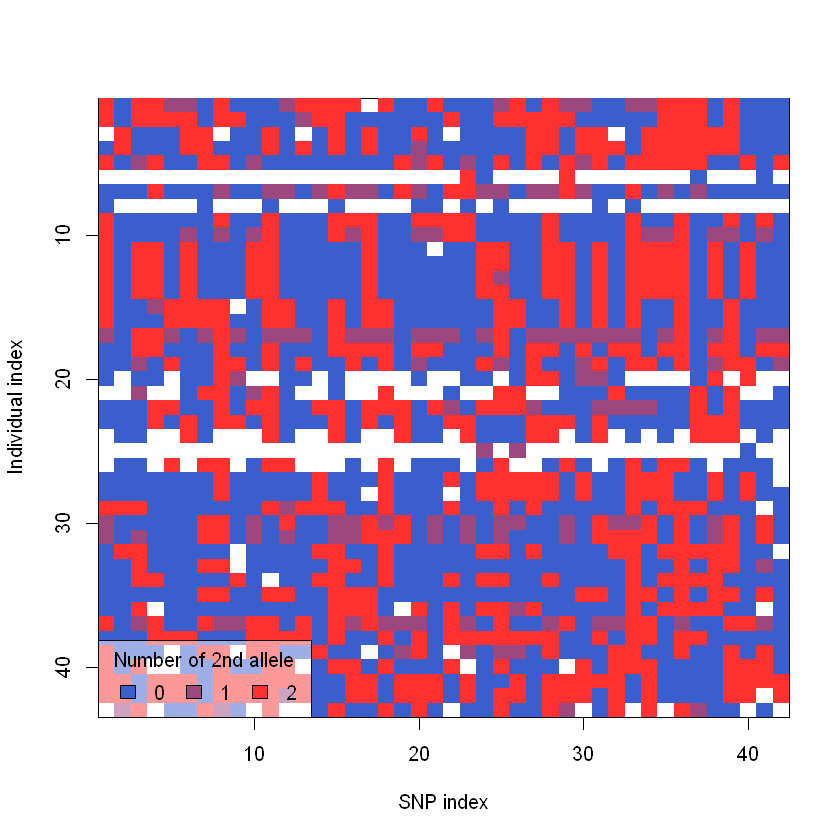

In [19]:
glPlot(x.sel2)

 === PCA of genlight object ===
Class: list of type glPca
Call ($call):glPca(x = x.sel2, nf = 24)

Eigenvalues ($eig):
 1.103 0.926 0.662 0.587 0.561 0.458 ...

Principal components ($scores):
 matrix with 43 rows (individuals) and 24 columns (axes) 

Principal axes ($loadings):
 matrix with 42 rows (SNPs) and 24 columns (axes) 


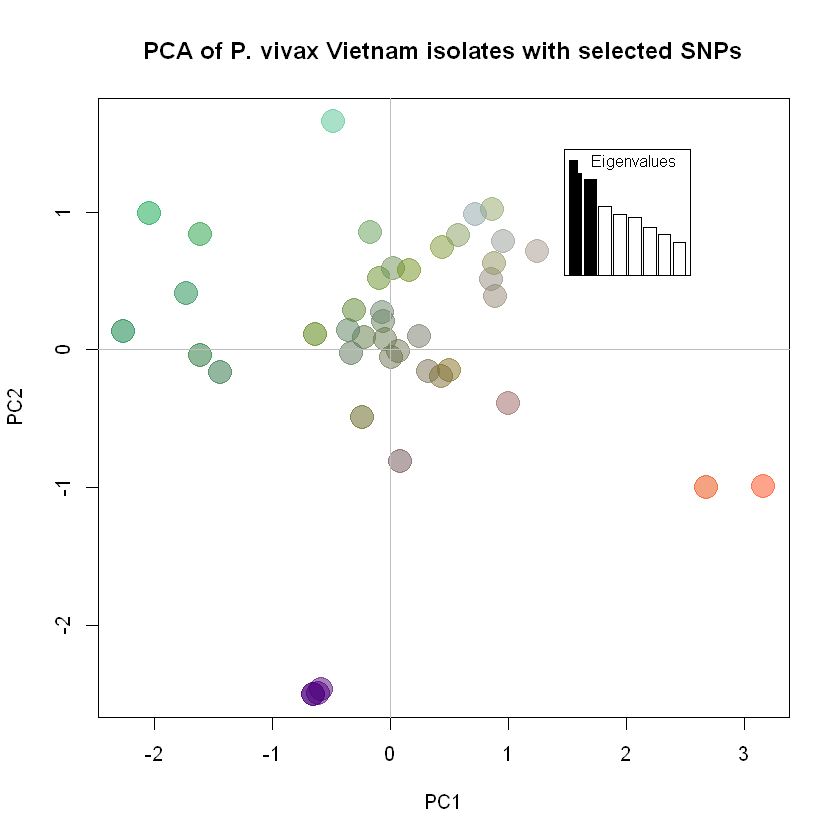

In [20]:
### PCA
pca2 <- glPca(x.sel2, nf=24)
pca2

myCol <- colorplot(pca2$scores,pca2$scores, transp=TRUE, cex=4)
abline(h=0,v=0, col="grey")
add.scatter.eig(pca2$eig[1:8],2,1,2, posi="topright", inset=.175, ratio=.15)
title("PCA of P. vivax Vietnam isolates with selected SNPs")


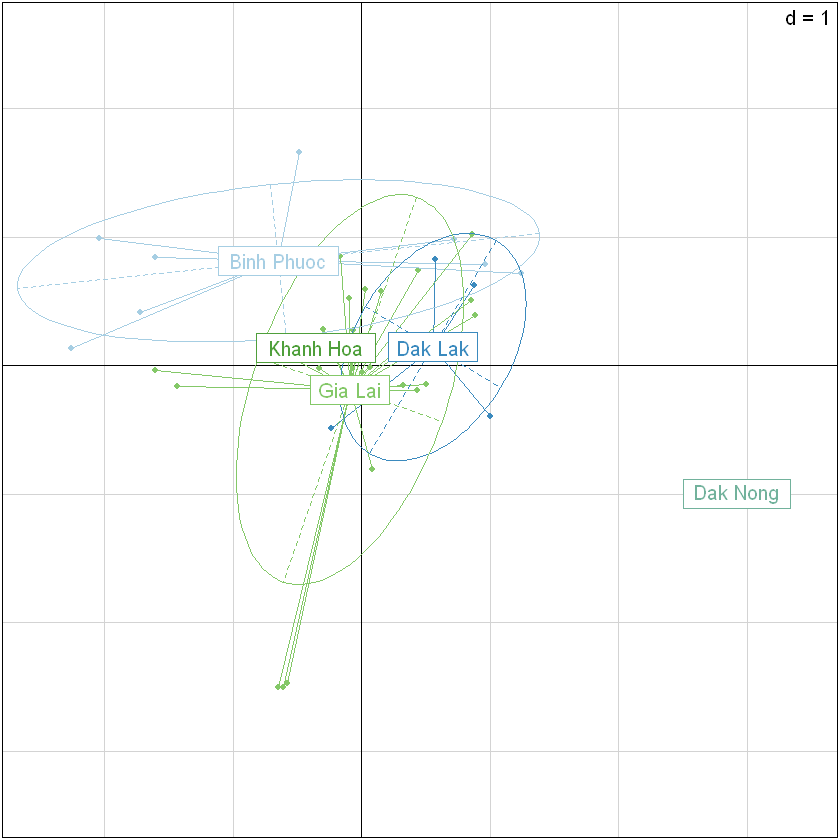

In [22]:
### PCA
s.class(pca2$scores
        , fac=pop(x.sel2), col=funky(15))


Phylogenetic tree with 43 tips and 41 internal nodes.

Tip labels:
	CRCPV-007-0a, CRCPV-007-35, CRCPV-008-0a, CRCPV-008-42, CRCPV-010-0a, CRCPV-010-35, ...

Unrooted; includes branch lengths.

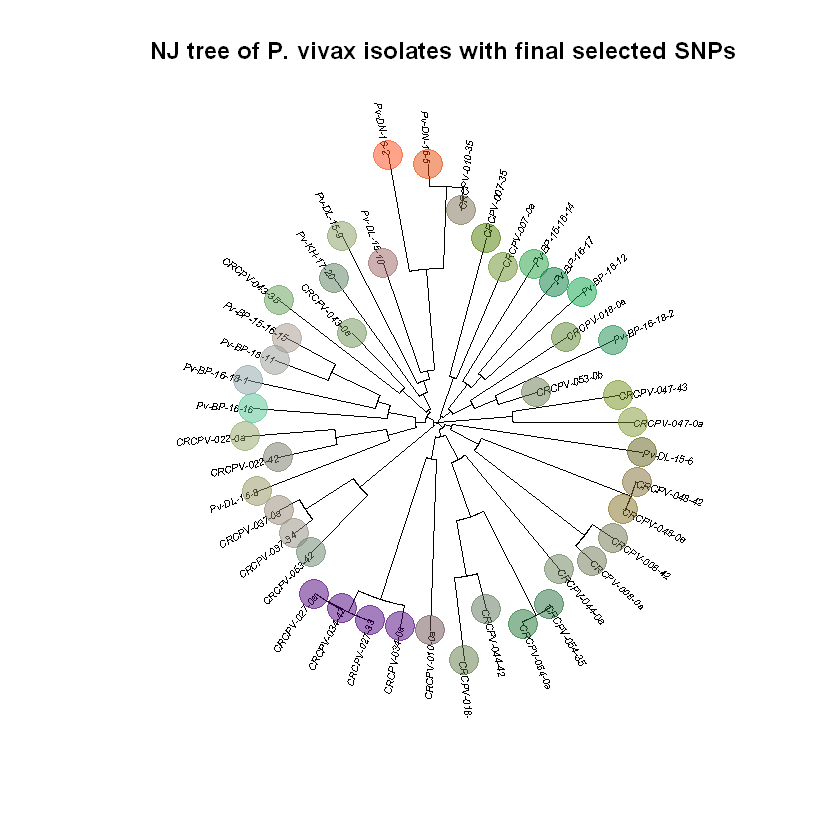

In [23]:
tre3 <- njs(dist(as.matrix(x.sel2)))
tre3
plot(tre3, typ="fan", show.tip=TRUE, cex = 0.5)
tiplabels(pch=20, col=myCol, cex=5)
title("NJ tree of P. vivax isolates with final selected SNPs")


## comparison to WGS (all SNPs) 

 === PCA of genlight object ===
Class: list of type glPca
Call ($call):glPca(x = x, nf = 24)

Eigenvalues ($eig):
 760.028 442.039 389.597 354.105 330.77 307.075 ...

Principal components ($scores):
 matrix with 43 rows (individuals) and 24 columns (axes) 

Principal axes ($loadings):
 matrix with 191849 rows (SNPs) and 24 columns (axes) 


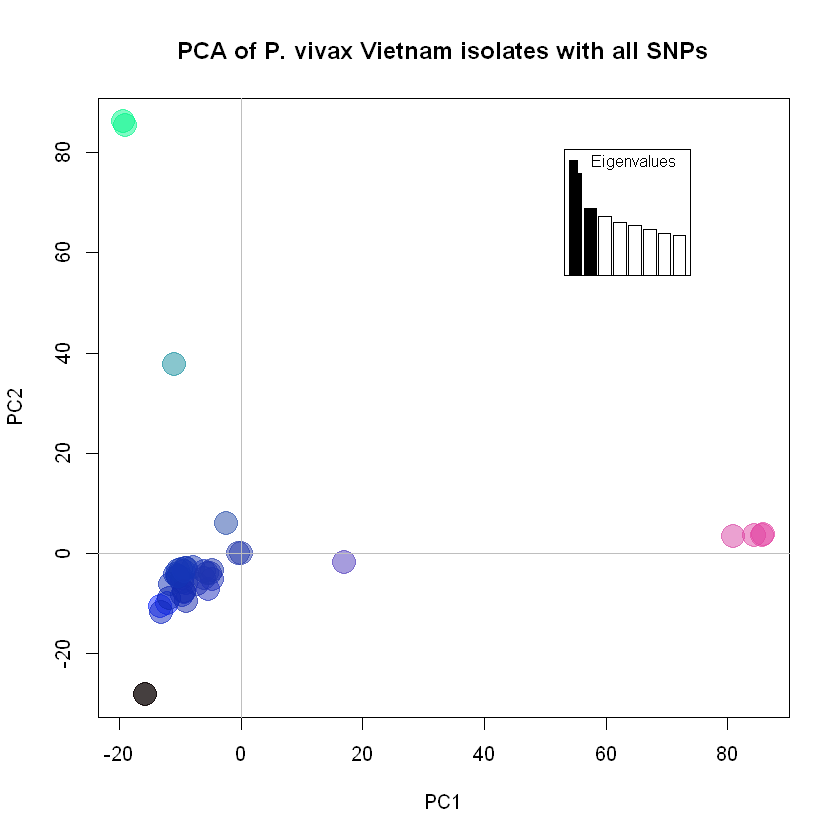

In [24]:
### PCA with all SNPs
pca3 <- glPca(x, nf=24)
pca3

myCol <- colorplot(pca3$scores,pca3$scores, transp=TRUE, cex=4)
abline(h=0,v=0, col="grey")
add.scatter.eig(pca3$eig[1:8],2,1,2, posi="topright", inset=.175, ratio=.15)
title("PCA of P. vivax Vietnam isolates with all SNPs")


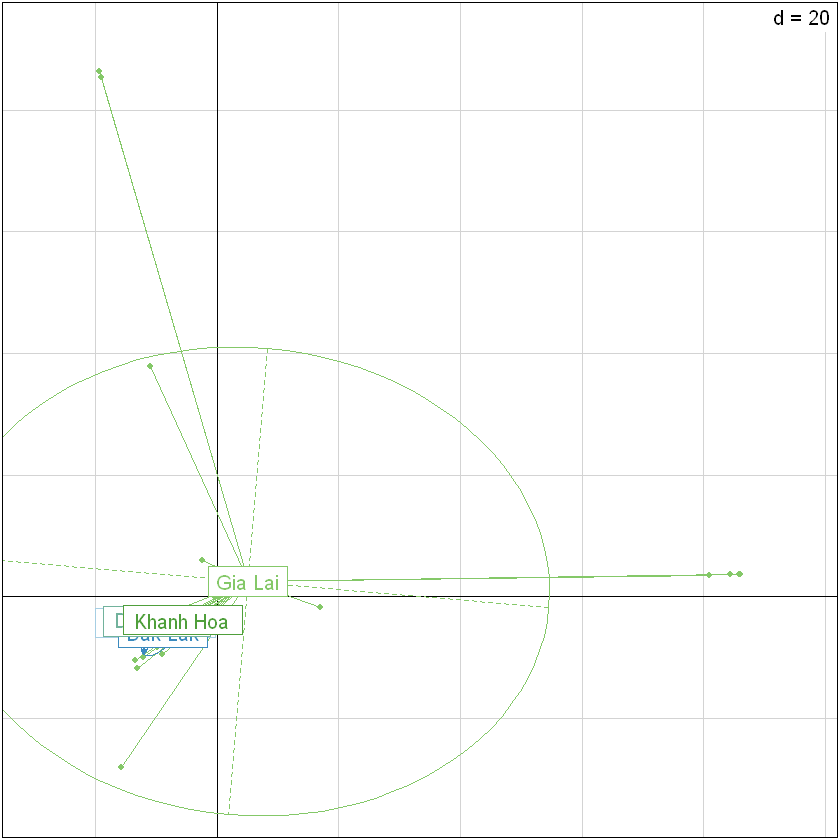

In [25]:
s.class(pca3$scores, fac=pop(x), col=funky(15))


Phylogenetic tree with 43 tips and 41 internal nodes.

Tip labels:
	CRCPV-007-0a, CRCPV-007-35, CRCPV-008-0a, CRCPV-008-42, CRCPV-010-0a, CRCPV-010-35, ...

Unrooted; includes branch lengths.

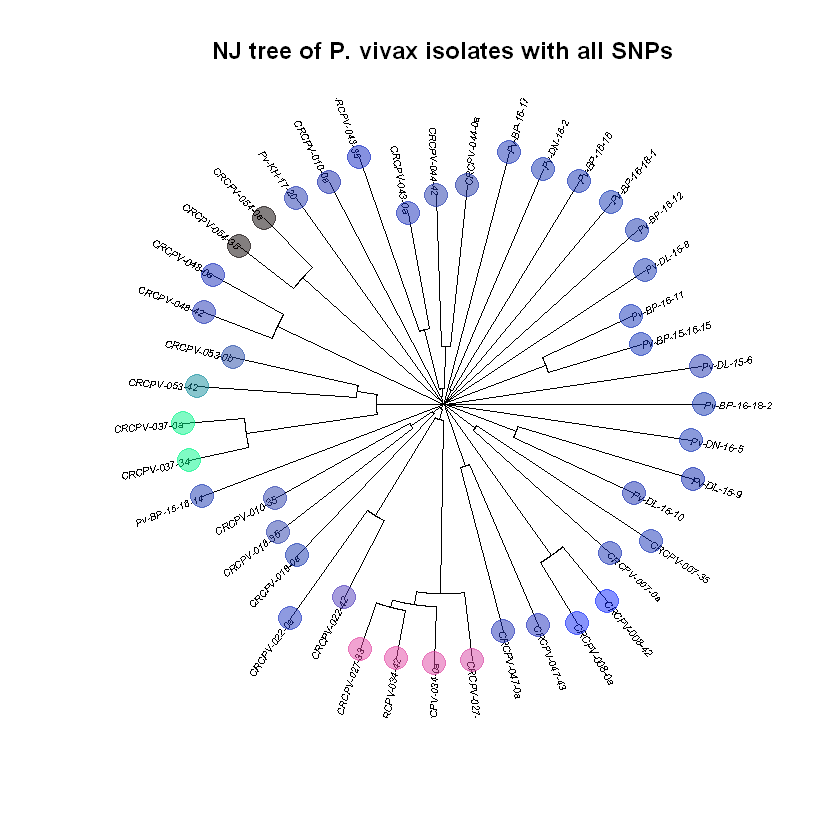

In [26]:
tre4 <- njs(dist(as.matrix(x)))
tre4
plot(tre4, typ="fan", show.tip=TRUE, cex=0.5)
tiplabels(pch=20, col=myCol, cex=4)
title("NJ tree of P. vivax isolates with all SNPs")
